In [342]:
#Credit Card Fraud Detection (Task 3)
import pandas as pd 
import numpy as np
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib
import seaborn as sns
import lightgbm as lgb
import sklearn #
import xgboost as xgb
import matplotlib.pyplot as plt
IS_LOCAL = False
import os
if IS_LOCAL:
    PATH = "/kaggle/input/creditcardfraud"
else:
    PATH = "../input"
    IS_LOCAL = False
# Set numpy seed 
np.random.seed(42)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score ,RocCurveDisplay,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
sns.set_style('whitegrid')
%matplotlib inline 
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [341]:
data_df = pd.read_csv('creditcard.csv')

In [319]:
pd.set_option('display.max_columns', 100)

In [320]:
RFC_METRIC = 'gini'  
NUM_ESTIMATORS = 100
NO_JOBS = 4 

In [321]:
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
#TRAIN/VALIDATION/TEST SPLIT
TEST_SIZE = 0.20 # test size using_train_test_split

In [322]:
#CROSS-VALIDATION
NUMBER_KFOLDS = 5

In [323]:
RANDOM_STATE = 2018
MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

In [325]:
data_df = pd.read_csv('creditcard.csv')

In [326]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


In [327]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [302]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [328]:
data_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [329]:
data_df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [330]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V15,V1,V14,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


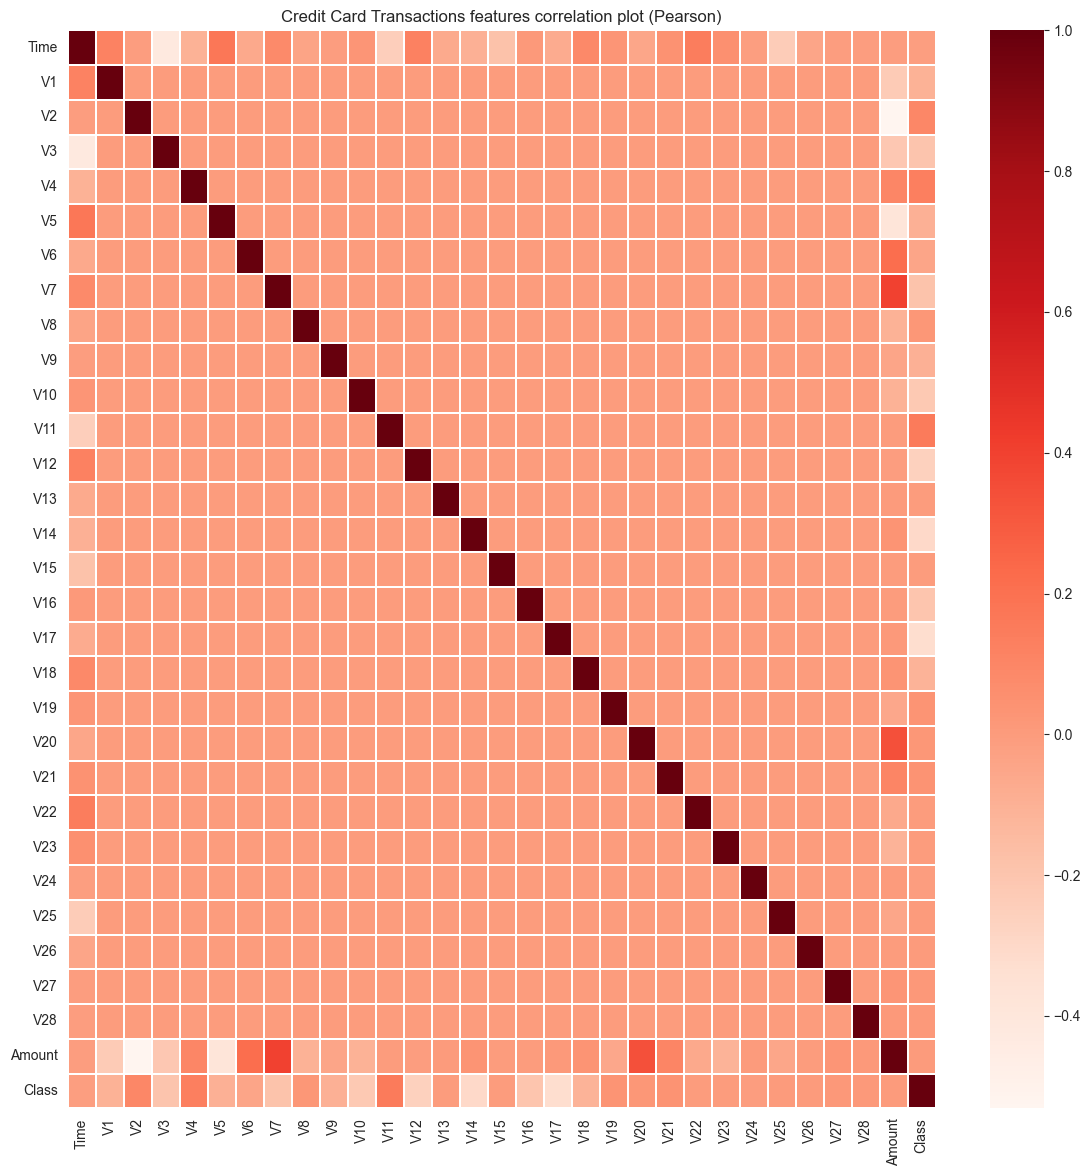

In [331]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

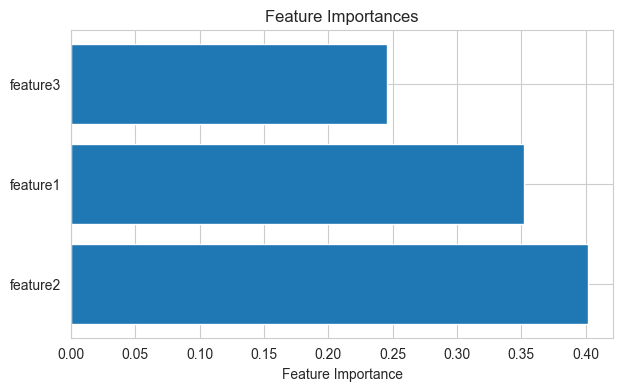

In [332]:
# Example training data and model
X_train = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]  # Replace with actual data
y_train = [0, 1, 0]  # Replace with actual target variable
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Feature importances from the trained model
feature_importances = clf.feature_importances_

# Create DataFrame for feature importances
tmp = pd.DataFrame({
    'Feature': predictors,
    'Feature importance': feature_importances
})
# Sort by feature importance
tmp = tmp.sort_values(by='Feature importance', ascending=False)
plt.figure(figsize=(7, 4))
plt.barh(tmp['Feature'], tmp['Feature importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

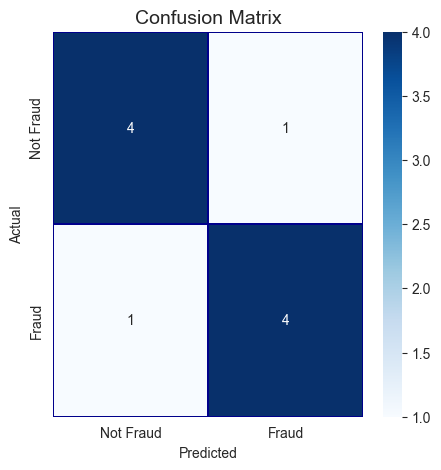

In [308]:
valid_df = pd.DataFrame({
    'target': [0, 1, 0, 1, 0, 1, 0, 0, 1, 1]  # Replace with actual values
})

preds = [0, 1, 0, 0, 0, 1, 1, 0, 1, 1]  # Replace with your predicted values

# Column name in the DataFrame that contains the actual target values
target = 'target'

# Create confusion matrix
cm = pd.crosstab(valid_df[target], preds, rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix
fig, ax1 = plt.subplots(ncols=1, figsize=(5, 5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'], 
            annot=True, 
            ax=ax1, 
            linewidths=.2, 
            linecolor="Darkblue", 
            cmap="Blues")

# Title and show plot
plt.title('Confusion Matrix', fontsize=14)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_2736\3992975389.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



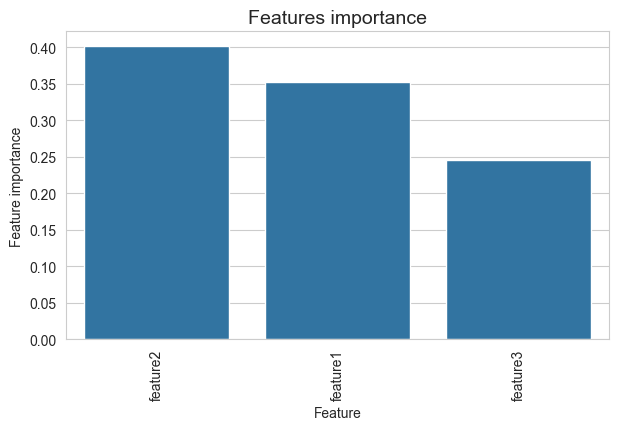

In [336]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

In [343]:
print(df.columns)
# Example DataFrame creation (replace with your actual data loading)
df = pd.DataFrame({
    'amount': [10, 20, 30, 40, 50],
    'time': [1, 2, 3, 4, 5]
})

# Scale the 'amount' and 'time' columns
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['amount']])
df['scaled_time'] = scaler.fit_transform(df[['time']])

# Check columns
print("Columns in DataFrame:", df.columns)

# Drop the columns if they exist
if 'scaled_amount' in df.columns and 'scaled_time' in df.columns:
    df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
else:
    print("Columns not found in DataFrame")

# Check DataFrame after dropping columns
print(df)

Index(['amount', 'time'], dtype='object')
Columns in DataFrame: Index(['amount', 'time', 'scaled_amount', 'scaled_time'], dtype='object')
   amount  time
0      10     1
1      20     2
2      30     3
3      40     4
4      50     5


In [335]:
print(model)

<Sequential name=sequential_13, built=True>


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

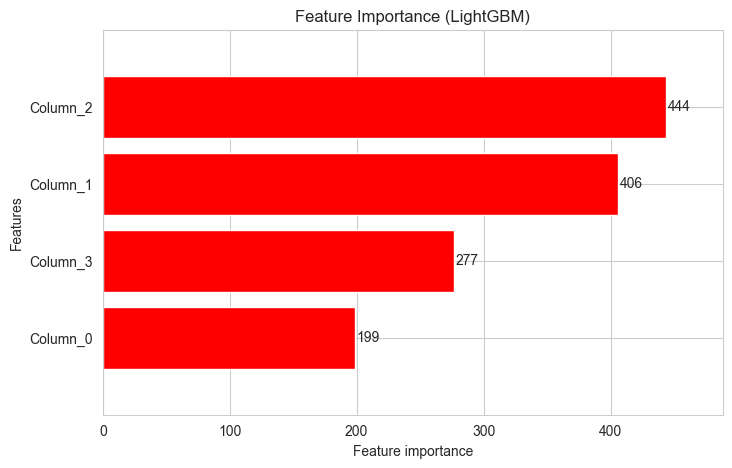

In [346]:
# Load example dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LightGBM model
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create a figure and axis for the plot
fig, ax = plt.subplots(ncols=1, figsize=(8, 5))

# Plot feature importances
lgb.plot_importance(model, height=0.8, title="Feature Importance (LightGBM)", ax=ax, color="red")

# Show the plot
plt.show()

Accuracy: 1.00
Feature importance ranking




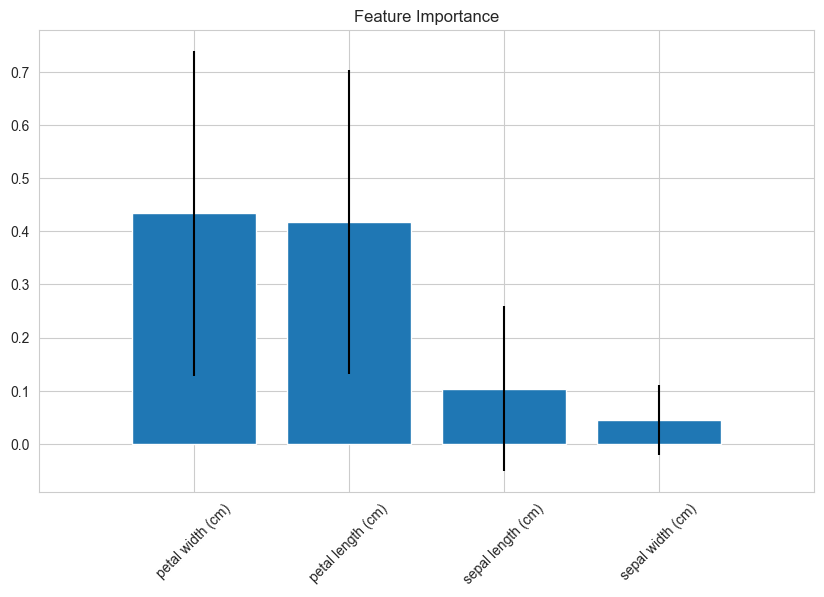

In [338]:
data = load_iris()
X = data.data
y = data.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the RandomForest model
rand_f = RandomForestClassifier(n_estimators=100, random_state=42)
rand_f.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rand_f.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plotting Feature Importances
print('Feature importance ranking\n\n')

# Extract feature importances
importances = rand_f.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand_f.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(data.feature_names)[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()


In [314]:
# Define the model
model = Sequential([
    Dense(input_dim=30, units=16, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                     │ (None, 16)                  │             496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 24)                  │             408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 20)                  │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 24)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,933 (7.55 KB)

 Trainable params: 1,933 (7.55 KB)

 Non-trainable params: 0 (0.00 B)

In [315]:
np.random.seed(42)
X = np.random.rand(1000, 30)  # 1000 samples, 30 features
y = np.random.randint(2, size=1000)  # Binary target variable

# Split data into training and testing sets
x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = Sequential([
    Dense(input_dim=30, units=16, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train_s, y_train_s, batch_size=15, epochs=15, validation_split=0.2)


Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4705 - loss: 0.7036 - val_accuracy: 0.4857 - val_loss: 0.6918
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4848 - loss: 0.6935 - val_accuracy: 0.5714 - val_loss: 0.6913
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5189 - loss: 0.6917 - val_accuracy: 0.5500 - val_loss: 0.6899
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5042 - loss: 0.6941 - val_accuracy: 0.5857 - val_loss: 0.6910
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5113 - loss: 0.6953 - val_accuracy: 0.5071 - val_loss: 0.6917
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5166 - loss: 0.6920 - val_accuracy: 0.5571 - val_loss: 0.6887
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5001 - loss: 0.6960 - val_accuracy: 0.5786 - val_loss: 0.6909
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4854 - loss: 0.6936 - val_accuracy: 0.5643 - val_loss

<Axes: >

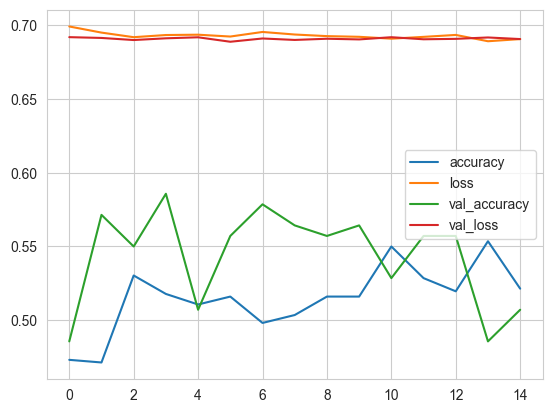

In [316]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [344]:
np.random.seed(42)
X = np.random.rand(1000, 30)  # 1000 samples, 30 features
y = np.random.randint(2, size=1000)  # Binary target variable

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = Sequential([
    Dense(input_dim=30, units=16, activation='relu'),
    Dense(units=24, activation='relu'),
    Dropout(0.5),
    Dense(units=20, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(x_train, y_train, batch_size=15, epochs=15, validation_split=0.2)

# Evaluate the model on test data
score = model.evaluate(x_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5276 - loss: 0.6925 - val_accuracy: 0.4571 - val_loss: 0.6944
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5158 - loss: 0.6897 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4957 - loss: 0.6947 - val_accuracy: 0.4786 - val_loss: 0.6937
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5282 - loss: 0.6913 - val_accuracy: 0.5143 - val_loss: 0.6907
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5314 - loss: 0.6913 - val_accuracy: 0.5143 - val_loss: 0.6918
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5160 - loss: 0.6926 - val_accuracy: 0.5286 - val_loss: 0.6920
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5082 - loss: 0.6914 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5256 - loss: 0.6886 - val_accuracy: 0.4929 - val_loss

In [248]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [249]:
fraud = data_df[data_df.Class ==1]
normal = data_df[data_df.Class ==0]
print(f"Fraud :{fraud.shape}")
print(f"normal:{normal.shape}")

Fraud :(492, 31)
normal:(284315, 31)


C:\Users\Admin\AppData\Local\Temp\ipykernel_2736\4060921933.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



Text(0, 0.5, 'Counts')

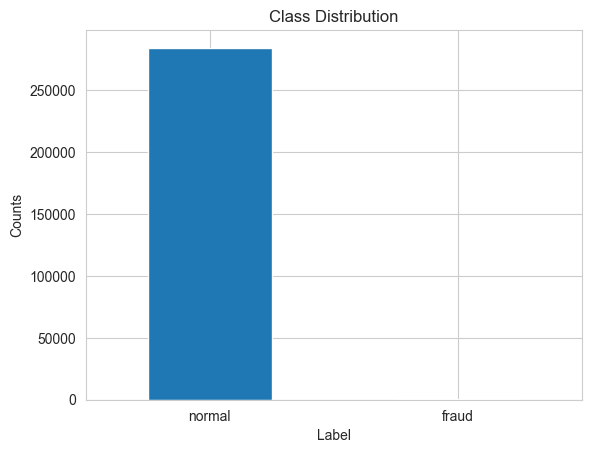

In [250]:
class_counts  = pd.value_counts(data_df['Class'],sort= True)
class_counts.plot(kind='bar',rot=0)
plt.title("Class Distribution")
plt.xticks(range(2),["normal","fraud"])
plt.xlabel("Label")
plt.ylabel("Counts")

In [251]:
def plot_hist(df,bins,column,log_scale=False):
    bins = 100
    fraud = data_df[data_df.Class == 1]
    normal = data_df[data_df.Class  == 0]
    fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
    fig.suptitle(f'Counts of {column} by class')
    ax1.hist(fraud[column],bins=bins,color="green")
    ax1.set_title("fraud")
    
    ax2.hist(normal[column],bins=bins,color="orange")
    ax2.set_title("normal")
    
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    
    if log_scale:
        plt.yscale('log')
        
    plt.xlim((np.min(data_df[column]),np.max(data_df[column])))
    plt.show()

In [252]:
print(data_df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [253]:
data_df.columns = data_df.columns.str.strip()

In [254]:
print(data_df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [255]:
# Check the first few rows of the DataFrame
print(data_df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

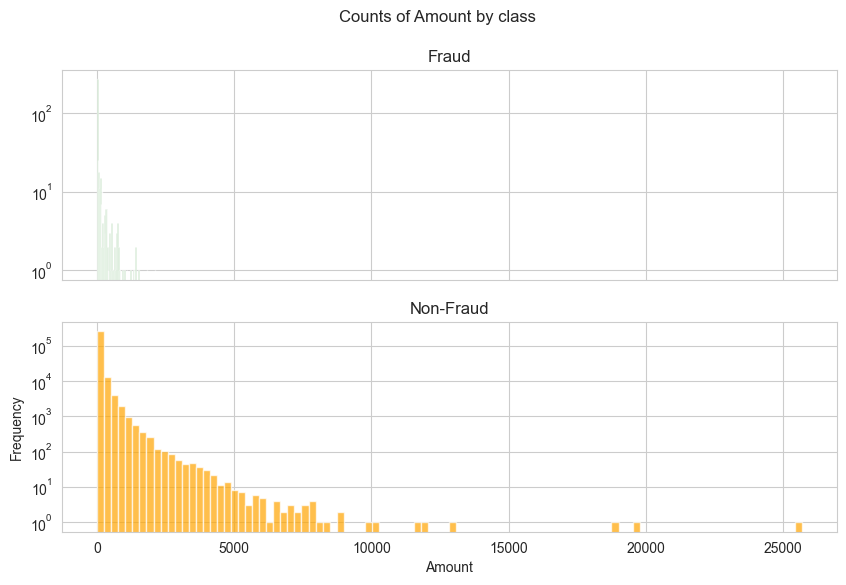

In [256]:
def plot_hist(df, bins, column, log_scale=False):
    # Check if the column exists in the DataFrame
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        return

    # Split DataFrame into fraud and non-fraud subsets
    fraud = df[df['Class'] == 1]
    normal = df[df['Class'] == 0]
    
    # Plot histograms
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
    fig.suptitle(f'Counts of {column} by class')
    
    ax1.hist(fraud[column], bins=bins, color="green", alpha=0.7)
    ax1.set_title("Fraud")
    
    ax2.hist(normal[column], bins=bins, color="orange", alpha=0.7)
    ax2.set_title("Non-Fraud")
    
    if log_scale:
        ax1.set_yscale('log')
        ax2.set_yscale('log')
    
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Example usage
plot_hist(data_df, bins=100, column='Amount', log_scale=True)

In [258]:
df_normal = data_df[data_df.Class ==0].sample(frac=.5,random_state=2020).reset_index(drop=True)
df_fraud = data_df[data_df.Class==1]

In [259]:
df_normal_train,df_normal_test = train_test_split(df_normal,test_size=.2,random_state=2020)
df_fraud_train,df_fraud_test = train_test_split(df_fraud,test_size=.2,random_state=2020)

In [260]:
df_normal_train,df_normal_validate = train_test_split(df_normal_train,test_size=.25,random_state=2020)
df_fraud_train,df_fraud_validate = train_test_split(df_fraud_train,test_size=.25,random_state=2020)
x_train = pd.concat((df_normal_train,df_fraud_train))
x_test = pd.concat((df_normal_test,df_fraud_test))
x_validate = pd.concat((df_normal_validate,df_fraud_validate))
y_train = np.array(x_train["Class"])
y_test= np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])
x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)
scaler = StandardScaler()
scaler.fit(pd.concat((df_normal, df_fraud)).drop("Class", axis=1))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

In [261]:
sk_model = LogisticRegression(random_state=None, max_iter=400,
solver='newton-cg').fit(x_train, y_train)

In [262]:
eval_acc = sk_model.score(x_test,y_test)
preds = sk_model.predict(x_test)
auc_score = roc_auc_score(y_test,preds)
print(f"Auc Score: {auc_score:.3%}")
print(f"Eval Accuracy: {eval_acc:.3%}")

Auc Score: 84.333%
Eval Accuracy: 99.870%


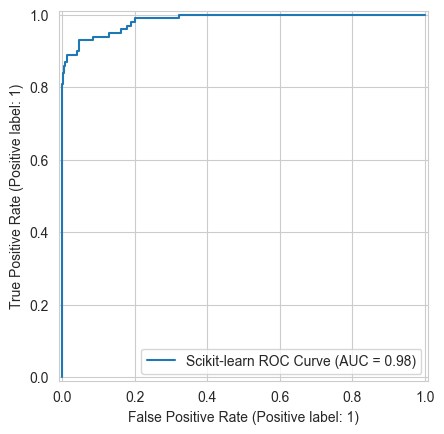

In [263]:
roc_plot = RocCurveDisplay.from_estimator(sk_model, x_test, y_test,
name='Scikit-learn ROC Curve')

Text(0.5, 23.52222222222222, 'Actual')

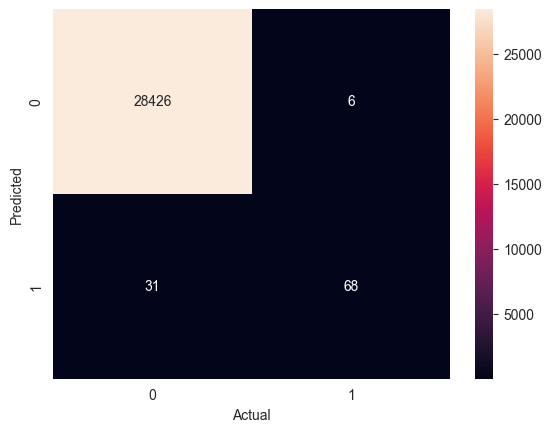

In [264]:
conf_matrix = confusion_matrix(y_test, preds)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
plt.ylabel('Predicted')
plt.xlabel('Actual')

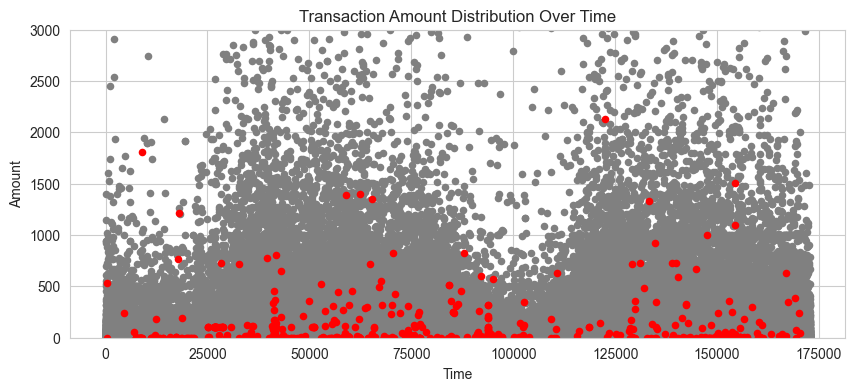

In [265]:
# Define color variables
gray_color = 'gray'
red_color = 'red'

# Create the scatter plot
f, ax = plt.subplots(figsize=(10, 4))

# Plot non-fraud transactions
sns.scatterplot(data=data_df.loc[data_df.Class==0], 
                x='Time', 
                y='Amount', 
                color=gray_color,
                s=30,
                alpha=1,
                linewidth=0,
                ax=ax)

# Plot fraud transactions
sns.scatterplot(data=data_df.loc[data_df.Class==1], 
                x='Time', 
                y='Amount', 
                color=red_color,
                s=30,
                alpha=1,
                linewidth=0,
                ax=ax)
# Customize plot
ax.set_xlabel('Time')
ax.set_ylabel('Amount')
ax.set_ylim(0, 3000)
ax.set_title("Transaction Amount Distribution Over Time")

# Display plot
plt.show()

In [266]:
pca_gs_results = pd.read_csv('creditcard.csv')

In [267]:
data = {
    'nComponents': [5, 10, 15, 20, 25],
    'Avg Precision': [0.4, 0.5, 0.6, 0.7, 0.8],
    'Rank': [1, 2, 3, 4, 5],
    'AvgTime': [50, 40, 30, 20, 10]
}
pca_gs_results = pd.DataFrame(data)

In [268]:
print(pca_gs_results.columns)

Index(['nComponents', 'Avg Precision', 'Rank', 'AvgTime'], dtype='object')


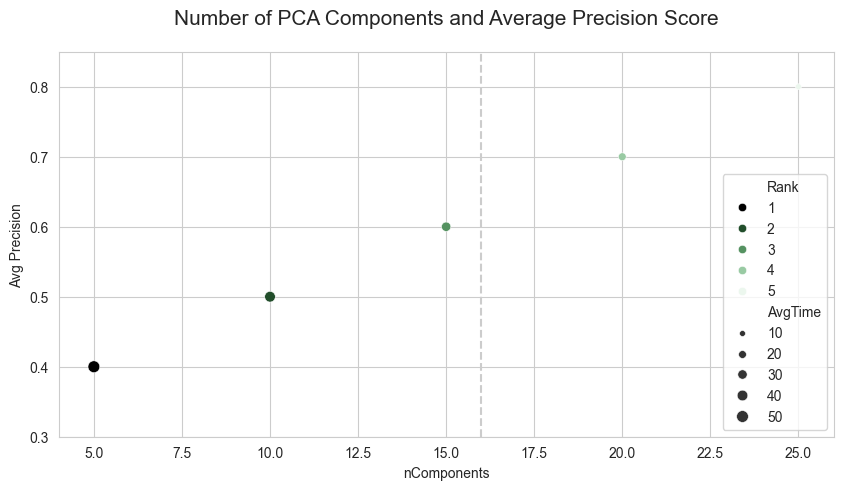

In [269]:
# Define color variables
gray_color = '#cccccc'
color_map = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

# Create the plot
f, ax = plt.subplots(figsize=(10, 5))

# Add vertical line at x = 16
ax.axvline(x=16, color=gray_color, linestyle='--', linewidth=1.5)

# Scatter plot
sns.scatterplot(data=pca_gs_results, 
                x='nComponents', 
                y='Avg Precision', 
                hue='Rank',  
                palette=color_map, 
                size='AvgTime', 
                ax=ax)

# Customize plot
plt.ylim(0.3, 0.85)
plt.legend(loc='lower right')
plt.title('Number of PCA Components and Average Precision Score', y=1.05, size=15)

# Show plot
plt.show()

In [345]:
# Create a synthetic imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.99, 0.01], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print class distribution before resampling
print("Original class distribution:", Counter(y_train))

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and resample
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Print class distribution after resampling
print("Resampled class distribution:", Counter(y_resampled))


Original class distribution: Counter({0: 693, 1: 7})
Resampled class distribution: Counter({0: 7, 1: 7})


In [271]:
data = {
    'Ratio': [100, 50, 25, 10, 5],
    'Recall': [0.7, 0.75, 0.78, 0.80, 0.85],
    'Precision': [0.65, 0.70, 0.72, 0.74, 0.77],
    'Specificity': [0.90, 0.85, 0.80, 0.78, 0.75],
    'F1': [0.67, 0.72, 0.75, 0.77, 0.80]
}

# Create DataFrame
report_df = pd.DataFrame(data)

In [272]:
print(report_df.head())
print(report_df.columns)

   Ratio  Recall  Precision  Specificity    F1
0    100    0.70       0.65         0.90  0.67
1     50    0.75       0.70         0.85  0.72
2     25    0.78       0.72         0.80  0.75
3     10    0.80       0.74         0.78  0.77
4      5    0.85       0.77         0.75  0.80
Index(['Ratio', 'Recall', 'Precision', 'Specificity', 'F1'], dtype='object')


In [273]:
print(data_df.head())
print(data_df.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

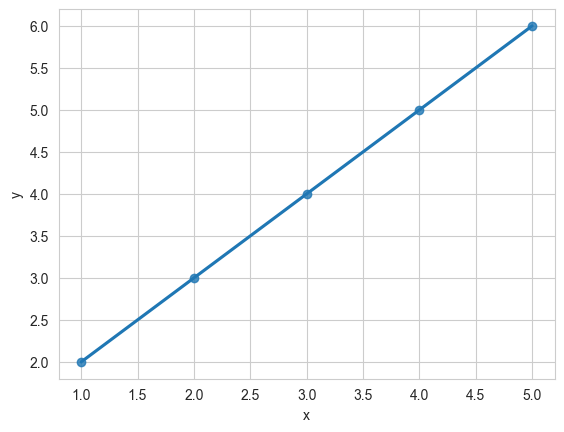

In [274]:
# Minimal example DataFrame
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 3, 4, 5, 6]
})

fig, ax = plt.subplots()
sns.regplot(x='x', y='y', data=data, ax=ax)
plt.show()

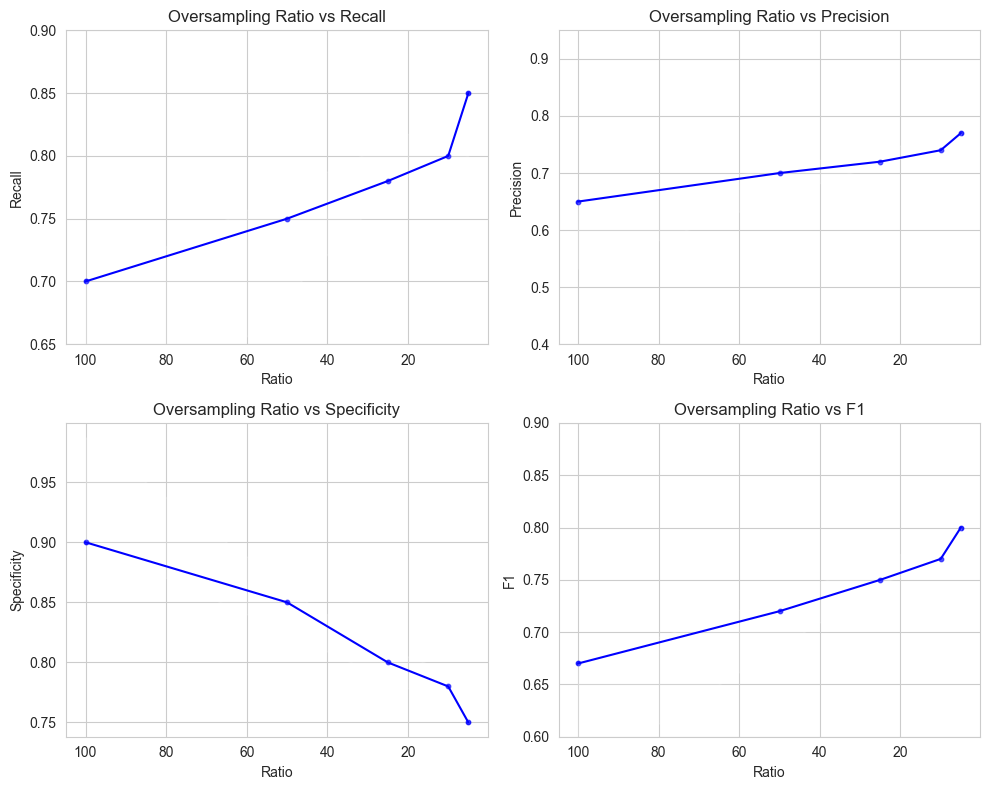

In [275]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Ratio against Recall
sns.regplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Recall", data=report_df, ax=axes[0, 0], color=blue_color)
axes[0, 0].invert_xaxis() # flip the x-axis
axes[0, 0].set_ylim([0.65, 0.9]) # set y-axis limits
axes[0, 0].set_title("Oversampling Ratio vs Recall")

# Ratio against Precision
sns.regplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Precision", data=report_df, ax=axes[0, 1], color=blue_color)
axes[0, 1].invert_xaxis() # flip the x-axis
axes[0, 1].set_ylim([0.4, 0.95]) # set y-axis limits
axes[0, 1].set_title("Oversampling Ratio vs Precision")

# Ratio against Specificity
sns.regplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="Specificity", data=report_df, ax=axes[1, 0], color=blue_color)
axes[1, 0].invert_xaxis() # flip the x-axis
axes[1, 0].set_title("Oversampling Ratio vs Specificity")

# Ratio against F1
sns.regplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], order=1, scatter=True, color='white', line_kws={'linestyle':'', 'linewidth':2}, scatter_kws={'s': 10, 'color':blue_color})
sns.lineplot(x="Ratio", y="F1", data=report_df, ax=axes[1, 1], color=blue_color)
axes[1, 1].invert_xaxis() # flip the x-axis
axes[1, 1].set_ylim([0.6, 0.9]) # set y-axis limits
axes[1, 1].set_title("Oversampling Ratio vs F1")

# Adjust the layout
plt.tight_layout()
plt.show()

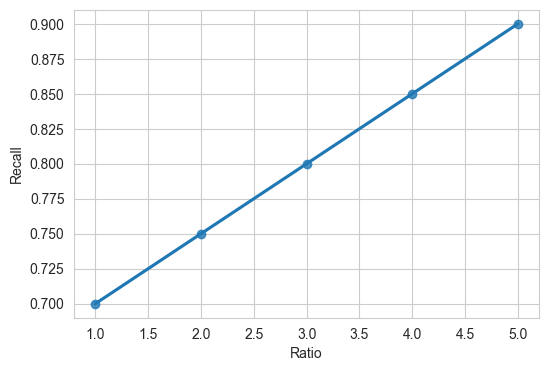

In [276]:
# Example DataFrame
test_df = pd.DataFrame({
    'Ratio': [1, 2, 3, 4, 5],
    'Recall': [0.7, 0.75, 0.8, 0.85, 0.9]
})

# Create a subplot
fig, ax = plt.subplots(figsize=(6, 4))

# Test regplot
sns.regplot(x="Ratio", y="Recall", data=test_df, ax=ax)
plt.show()
